<h1><center>Assignment 3 </center></h1>
<h2><center> SC9502B </center></h2>
<h3><center> Yasamin Modabber </center></h3>
<link rel="stylesheet" type="text/css" href="./text.css">

In [15]:
import matplotlib.pyplot as plt
import random

$\textbf{Question 1}$: Do not use any Python libraries for this problem (=pure Python only): Write a code
that computes the median for an arbitrary dataset

In [18]:
data_set = [1,5,2,7,10,3,22,1,3,4,55,6,9]
# We first sort the data set
N = len(data_set)
for _ in range(N):
    for i in range(N-1):
        if data_set[i+1]<data_set[i]:
            #swap
            data_set[i+1], data_set[i] = data_set[i], data_set[i+1]
print("The sorted sample data set is: ",data_set)
print(N)
#Then select the median
if N%2 == 0:
    median = (data_set[int(N/2)] + data_set[int(N/2)-1])/2
else:
    median = data_set[int(N/2)]

print("The median of the sample data set is: ", median) 

The sorted sample data set is:  [1, 2, 3, 5, 7, 10, 22]
7
The median of the sample data set is:  5


$\textbf{Question 2:}$ Show that the alternative way to compute $σ^2$ given bellow is true:
$$\sigma^2=\frac{1}{N^2} \sum_{i<j}\left(x_i-x_j\right)^2 $$

$\textbf{Answer:}$

Equation 1.7 for population variance can be re-written in the following way:

$$\sigma^2=\frac{1}{N} \sum_{i=1}^{N} \left(x_i-\mu\right)^2 = \frac{1}{N} \sum_{i=1}^{N} \left( x_i ^2 + \mu^2 - 2 x_i \mu \right) $$
 
$$ = \frac{1}{N} \sum_{i=1}^{N}  x_i ^2 + \frac{1}{N} \sum_{i=1}^{N} \mu^2 -  \frac{1}{N} \sum_{i=1}^{N} 2 x_i \mu$$ 

$$= \frac{1}{N} \sum_{i=1}^{N}  x_i ^2 +  \mu^2 - 2 \mu^2 $$

$$= \frac{1}{N} \sum_{i=1}^{N}  x_i ^2 - \mu^2 $$

$$ \frac{1}{2 N} \left( \sum_{i=1}^{N}  x_i ^2 + \sum_{j=1}^{N}  x_j ^2 - 2 \sum_{i=1}^{N} x_i \mu  \right)$$

$$ \frac{1}{2 N^2} \left( \sum_{i=1}^{N} \sum_{j=1}^{N}  x_i ^2 + \sum_{i=1}^{N} \sum_{j=1}^{N}  x_j ^2 - 2 \sum_{i=1}^{N} \sum_{j=1}^{N} x_i x_j  \right)$$

$$ \frac{1}{2 N^2} \sum_{i=1}^{N} \sum_{j=1}^{N} \left(   x_i ^2 + x_j ^2 - 2 x_i x_j  \right) = \frac{1}{N^2} \sum_{i<j} \left(   x_i - x_j  \right)^2$$

since case $i<j$ or $j<i$ only accounts for half of the posabilities $(i=j \rightarrow x_i - x_j = 0 )$

$\textbf{Question 3:}$ Write a Python code that uses Equation 1.8 to compute the population variance. 

In [20]:
N=10000
data_set = [random.randint(0,100) for _ in range(N)] # A random data set of size N

# Population variance
def Population_variance(data_set):
    var = 0
    for i in range(N):
        for j in range(N):
            var += (data_set[i]-data_set[j])**2 #we can replace the i<j condition by dividing the sum by 2N**2 instaed of N**2
    var = var/(2*N**2)
    return var

P_variance= Population_variance(data_set) 
print("The variance of the sample data set is: ", P_variance)

The variance of the sample data set is:  848.12504896


$\textbf{Question 4:}$ Equation 1.9 computes the sample variance, that is division is made by NA −1 instead of NA (entire dataset). What is the difference between the two cases and where does it come from. Write a Python code and plot the difference between the two as a function of the sample size. 

$\textbf{Answer:}$

The difference between the Population varince and covariance of a sample size of N, lies in the factor by which they are divided. For Population varince, the sum of squared terms are divided by N, while for the sample variance the sum is divided by N-1. The idea behind this difference comes from variance of the whole population being larger than the variance of a sample of that population, and to account for this difference we use a correcting factor called Bessel factor $\frac{N}{N-1}$ to get the average of unbiased variance as a function of biased one which we would get if we devide the terms by N.

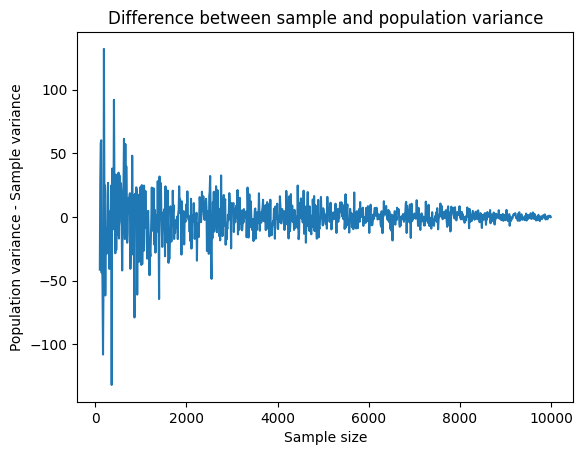

In [30]:
#Sample variance: 
def Sample_variance(data_set,n): 
    sample = random.sample(data_set,n)
    mean_sample = sum(sample)/n
    var = 0
    for i in range(n):
        var += (sample[i]-mean_sample)**2
    var = var/(n-1)
    return var

n_range = [10*i for i in range(10, int(N/10))]
diff_variance = []
for n in n_range:
    diff_variance.append(Sample_variance(data_set,n)- P_variance)
plt.title("Difference between sample and population variance")
plt.xlabel("Sample size")
plt.ylabel("Population variance - Sample variance")
plt.plot(n_range,diff_variance)

$\textbf{Question 5:}$ Let μ = 170 and σ = 7. Prove, showing all steps, that Equation 1.13 is true.

$\textbf{Answer:}$


To calculate the result of the gaussian integral in

$$
I = \int_{\infty}^{\infty} d x f(x)=\frac{1}{\sigma \sqrt{2 \pi}} \int_{-\infty}^{\infty} d x e^{-(x-\mu)^2 /(2 \sigma^2)}
$$

we switch to polar coordinates and calculate $I^2$ instead. We have:


$$
I^2 = \frac{1}{2  \pi \sigma^2}  \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}   e^{-(x-\mu)^2 /(2 \sigma^2)} e^{-(y-\mu)^2 /(2 \sigma^2)}d x d y = \frac{2}{ \pi \sigma^2} \int_{0}^{\infty}  \int_{0}^{\infty}   e^{-(x-\mu)^2 /(2 \sigma^2)} e^{-(y-\mu)^2 /(2 \sigma^2)}d x d y
$$

using a change of variables $u = x-\mu$ and $v = y-\mu $ we have:

$$
I^2 = \frac{2}{ \pi \sigma^2} \int_{0}^{\infty}  \int_{0}^{\infty}   e^{-(v^2 + u^2) /(2 \sigma^2)} d v d u .
$$

Switching to polar coordinates we have $v^2 + u^2 = r^2$ and $d v d u = r d r d\theta$:

$$
I^2 = \frac{2}{ \pi \sigma^2} \int_{0}^{\infty}  \int_{0}^{\pi / 2}  r e^{-r^2 /(2 \sigma^2)}  d \theta d r = \frac{2}{ \pi \sigma^2} \frac{\pi}{2} \int_{0}^{\infty}  r e^{-r^2 /(2 \sigma^2)}  d r = - \frac{1}{\sigma^2} \sigma^2 e^{-r^2} |^{\inf}_0 = 1
$$

The result is equal to 1, independant of our choice of values for $\sigma$ and $\mu$.